In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('train_ctrUa4K (1).csv')

In [3]:
test = pd.read_csv('test_lAUu6dG (1).csv')

In [4]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace = True)

In [7]:
df['Gender'].fillna('Male', inplace = True)
df['Married'].fillna('Yes', inplace = True)
df['Dependents'].fillna(0, inplace = True)
df['Self_Employed'].fillna('No', inplace = True)
df['Credit_History'].fillna(1.0, inplace = True)

In [8]:
df['Gender']= LabelEncoder().fit_transform(df['Gender'])
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df.drop('Loan_ID',axis = 1, inplace = True)

In [12]:
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [13]:
df.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_0                     uint8
Gender_1                     uint8
Married_0                    uint8
Married_1                    uint8
Dependents_0                 uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [14]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_0,Gender_1,Married_0,Married_1,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


# Entropy Decision Tree

In [15]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [18]:
dtree = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [19]:
pred = dtree.predict(x_test)
pred

array(['N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N

In [20]:
accuracy_score(y_test,pred)

0.7297297297297297

In [21]:
confusion_matrix(y_test,pred)

array([[39, 26],
       [24, 96]])

In [22]:
labels=x_train.columns
labels

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_0', 'Gender_1',
       'Married_0', 'Married_1', 'Dependents_0', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

### Tree visualization

In [23]:
import graphviz
from sklearn import tree
from graphviz import Source
import os

In [24]:
os.environ["PATH"]

'/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin'

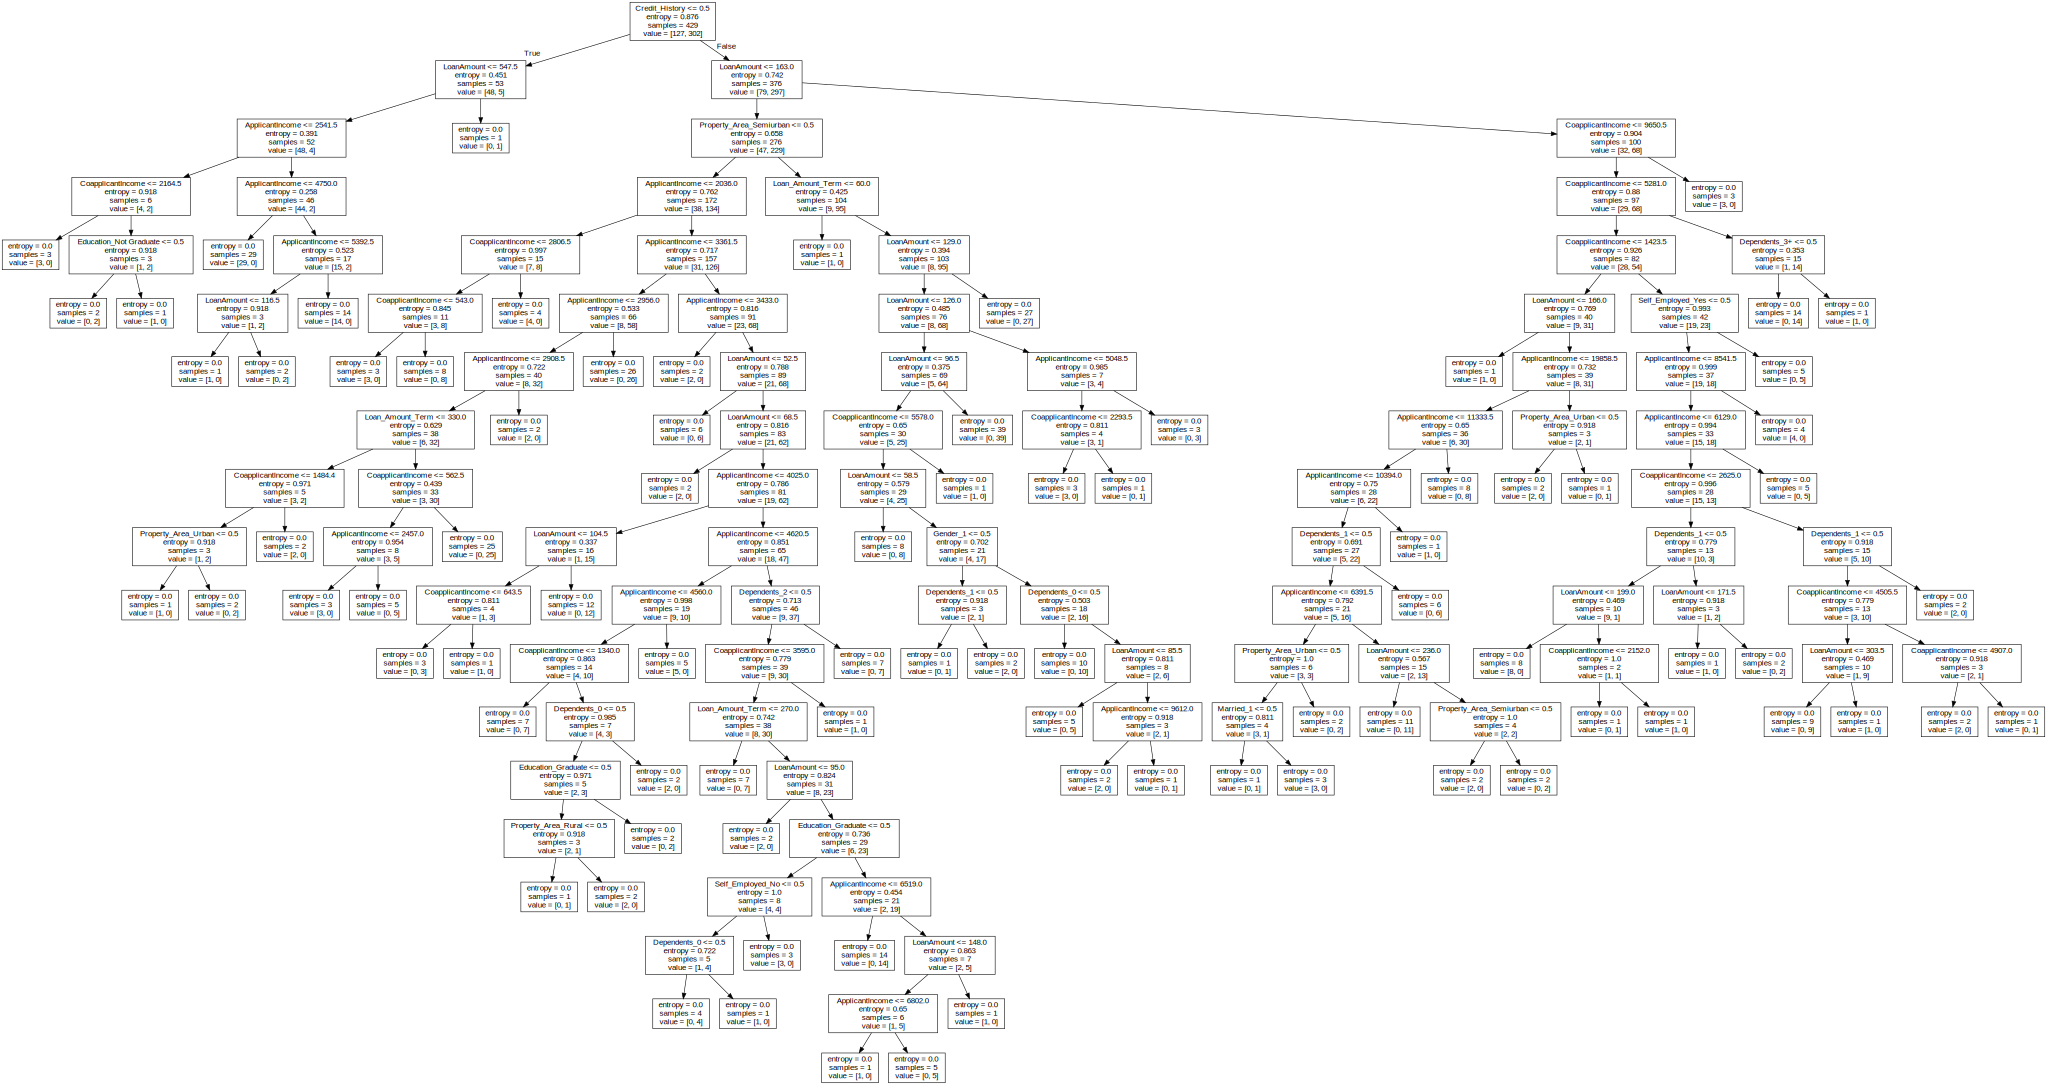

In [25]:
Source(tree.export_graphviz(dtree,feature_names=labels))

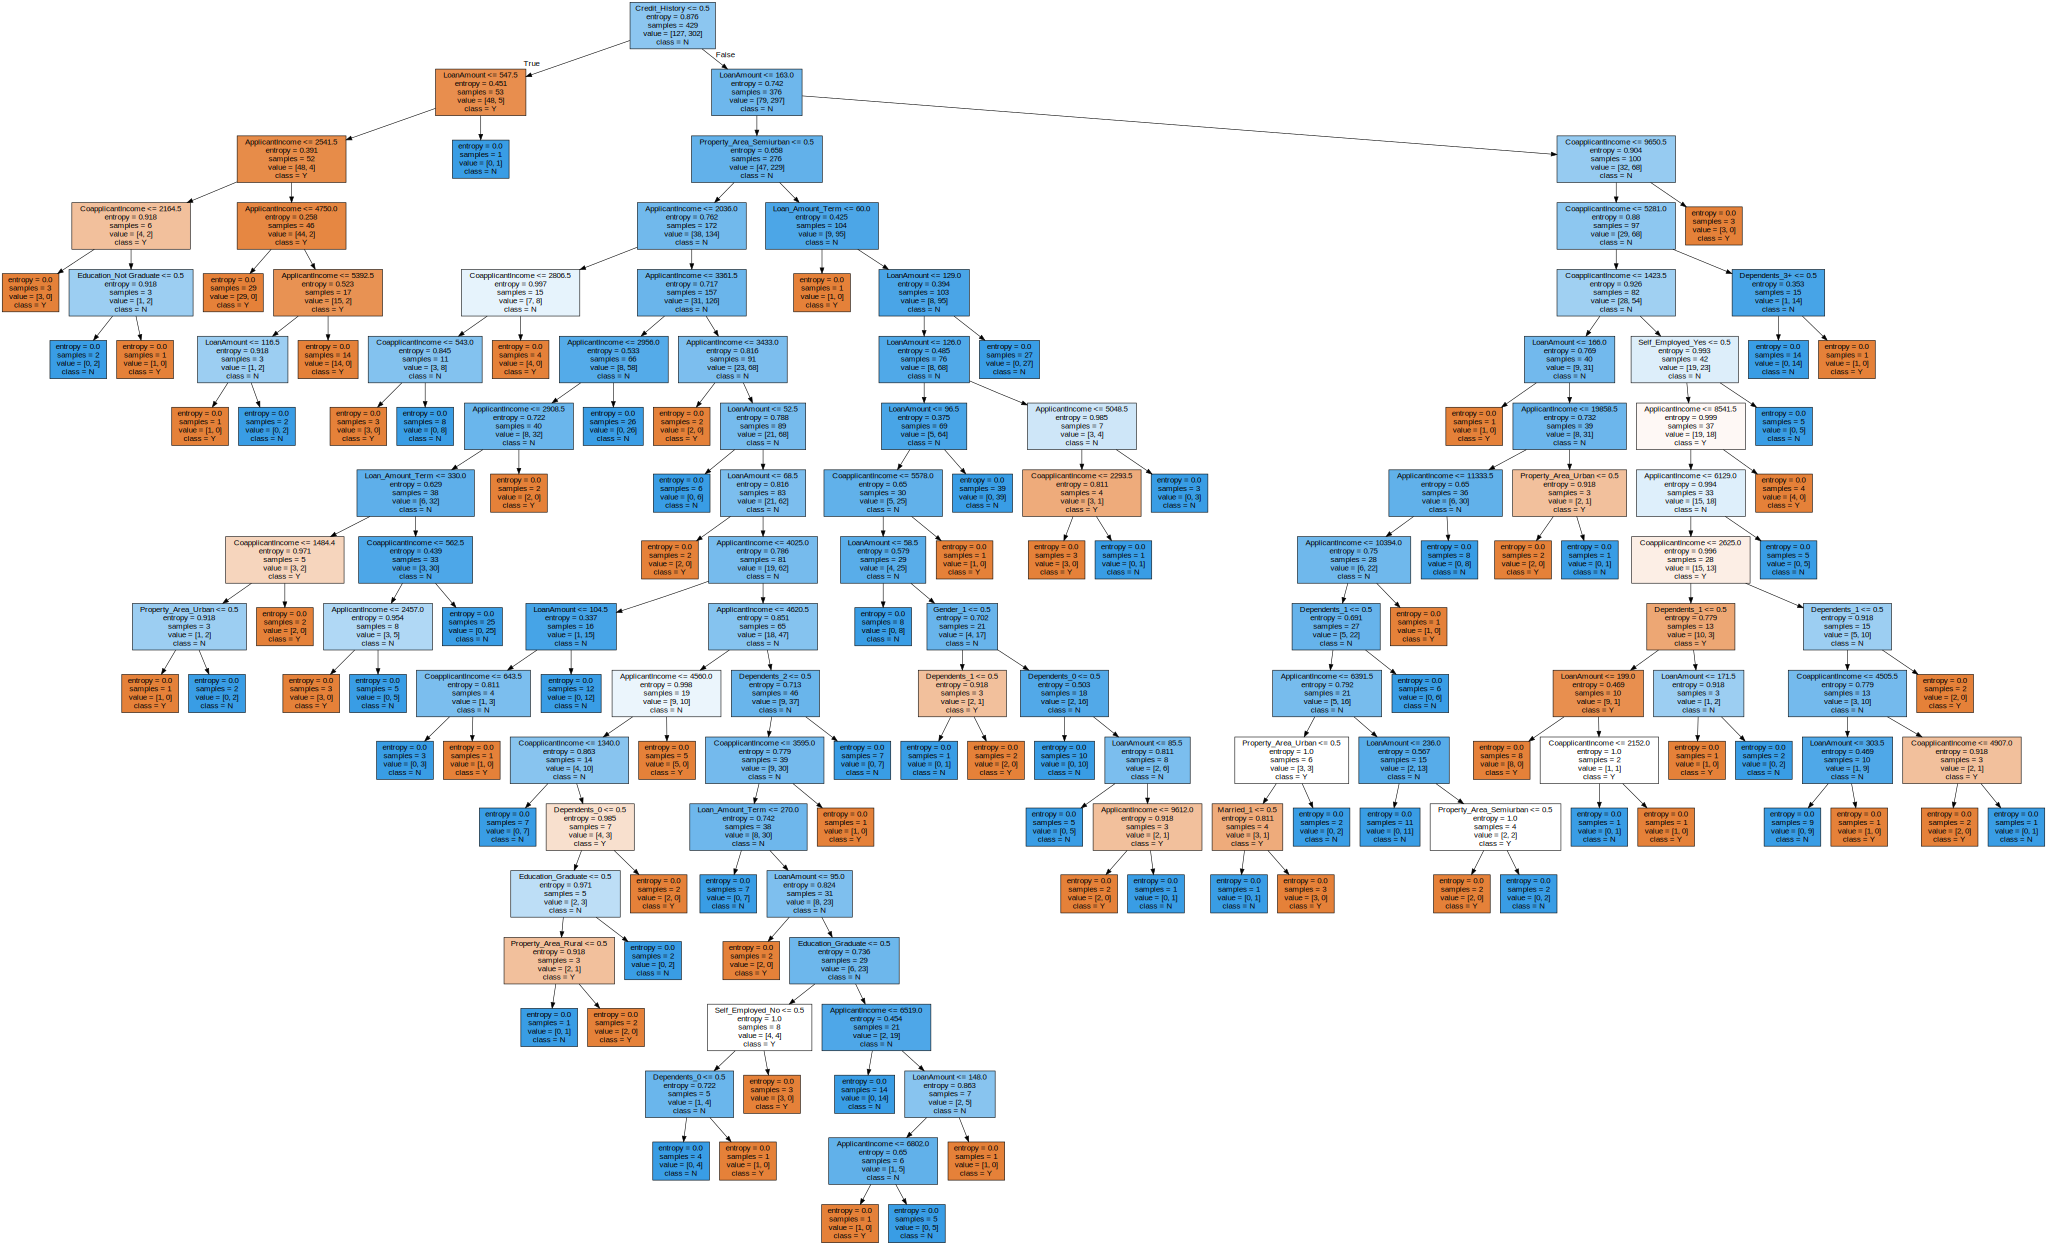

In [26]:
graphviz.Source(tree.export_graphviz(dtree,feature_names=labels, class_names = df.Loan_Status.unique(), filled = True))

In [27]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bagging = BaggingClassifier(base_estimator = dtree, n_estimators = 500, random_state = 100).fit(x_train,y_train)

In [29]:
predict_bag = bagging.predict(x_test)

In [30]:
confusion_matrix(y_test, predict_bag)

array([[ 38,  27],
       [  9, 111]])

In [31]:
accuracy_score(y_test,pred)

0.7297297297297297

# Gini Decision Tree

### Gini Decision Tree Model

In [32]:
gtree = DecisionTreeClassifier(criterion='gini').fit(x_train,y_train)

### Gini Decision Tree Prediction

In [33]:
pred1 = gtree.predict(x_test)
pred1

array(['N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N

### Gini Decision Tree Accuracy Score

In [34]:
accuracy_score(y_test,pred1)

0.7243243243243244

In [35]:
confusion_matrix(y_test,pred1)

array([[40, 25],
       [26, 94]])

### Printing Gini Decision Tree 

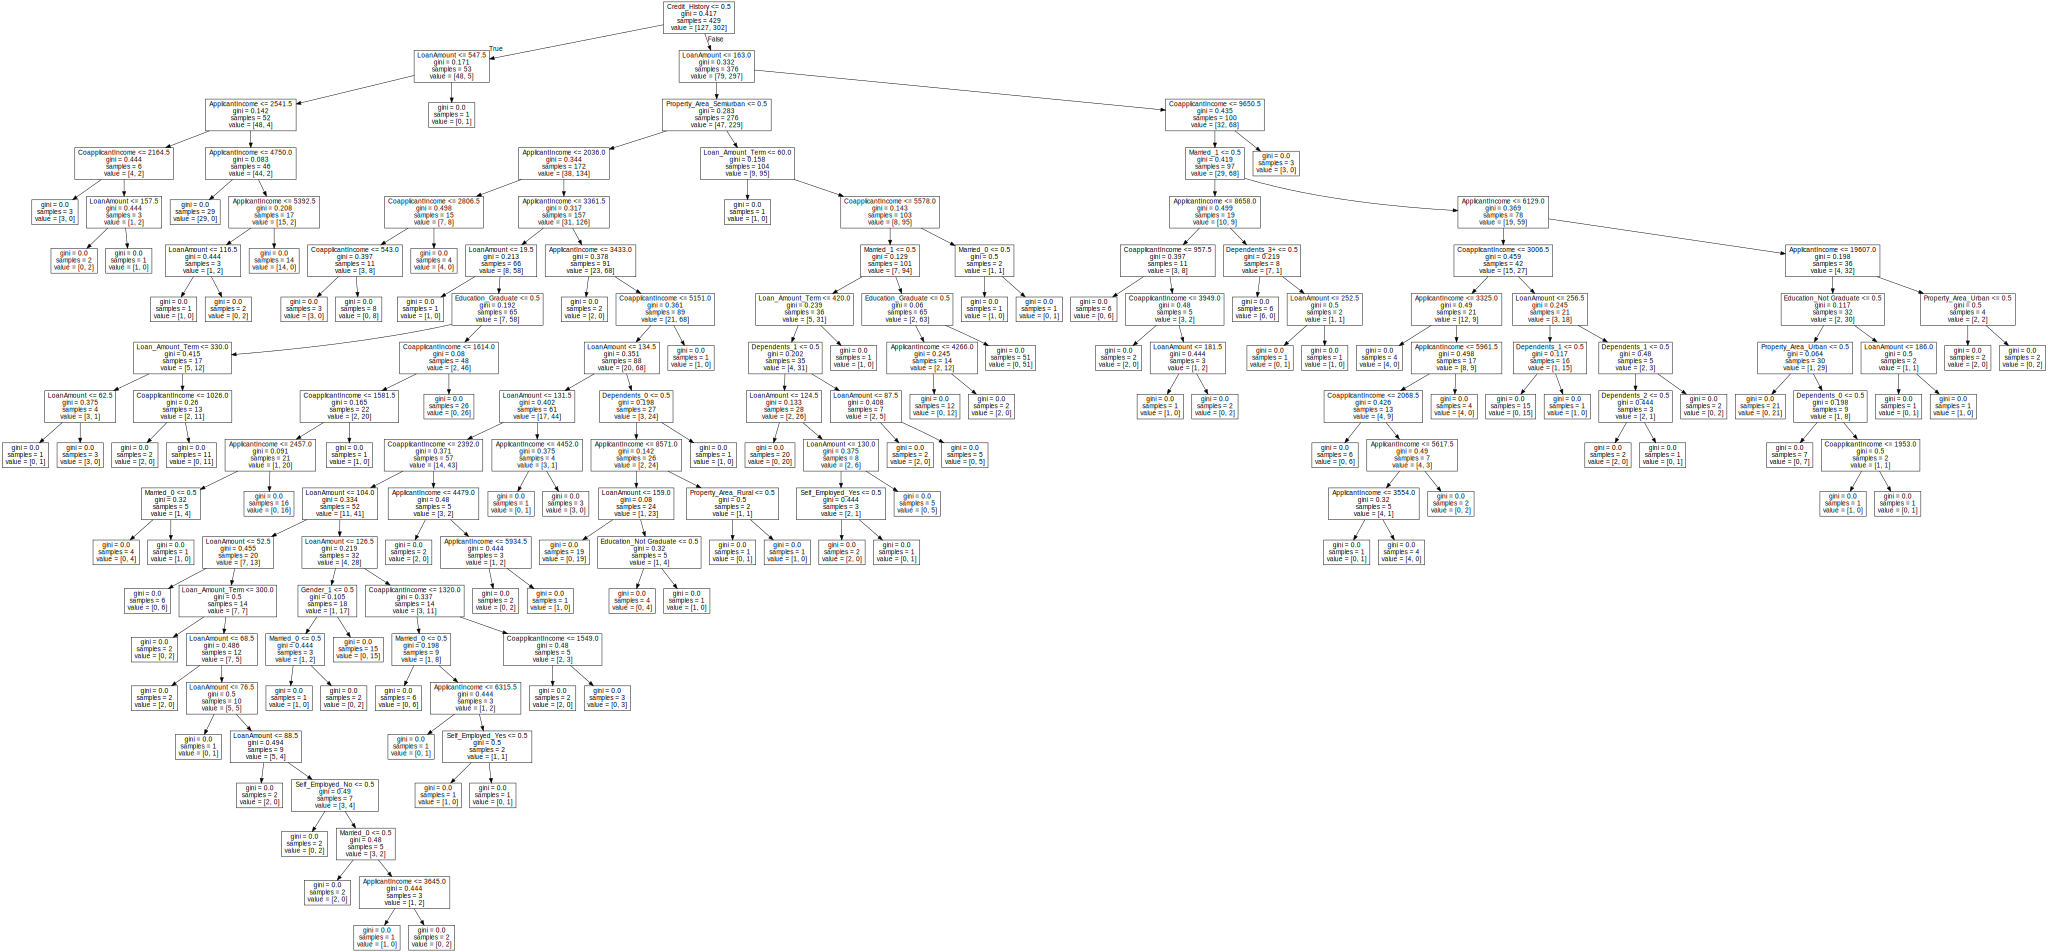

In [36]:
Source(tree.export_graphviz(gtree,feature_names=labels))

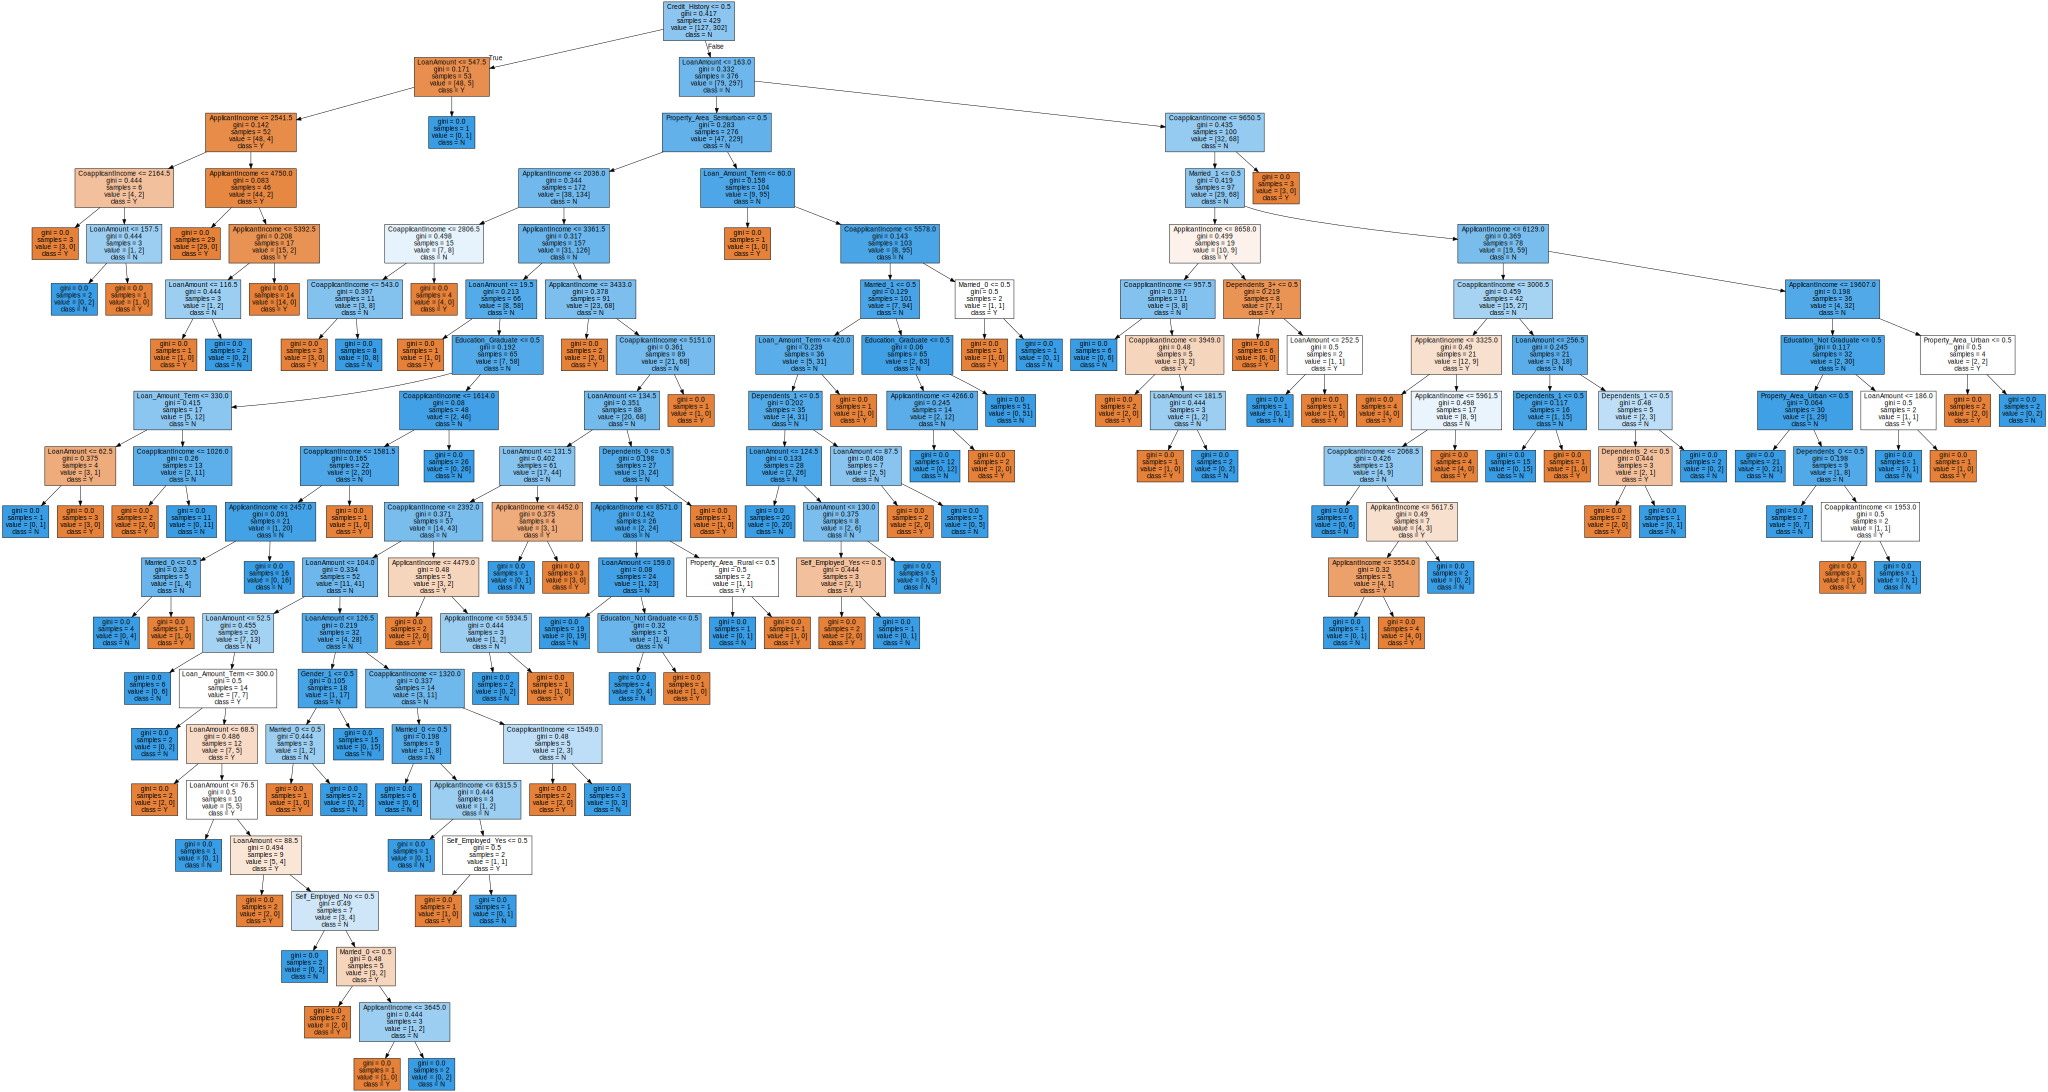

In [37]:
graphviz.Source(tree.export_graphviz(gtree,feature_names=labels, class_names = df.Loan_Status.unique(), filled = True))